<a href="https://colab.research.google.com/github/vanshita9414/Arima-/blob/master/Copy_of_covid_19_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving covid_19_india.csv to covid_19_india (1).csv


In [ ]:
df=pd.read_csv(io.StringIO(uploaded['covid_19_india.csv'].decode('utf-8')))
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
5751,5752,30/08/20,8:00 AM,Telengana,-,-,90988,818,123090
5752,5753,30/08/20,8:00 AM,Tripura,-,-,7232,98,11307
5753,5754,30/08/20,8:00 AM,Uttarakhand,-,-,12586,250,18571
5754,5755,30/08/20,8:00 AM,Uttar Pradesh,-,-,162741,3356,219457


In [ ]:
today=df[df["State/UnionTerritory"]=="Kerela"]

In [ ]:
df['State/UnionTerritory'].value_counts()

Kerala                                      214
Delhi                                       182
Rajasthan                                   181
Uttar Pradesh                               180
Haryana                                     180
Ladakh                                      177
Tamil Nadu                                  177
Karnataka                                   175
Maharashtra                                 175
Jammu and Kashmir                           175
Punjab                                      175
Andhra Pradesh                              172
Uttarakhand                                 169
Odisha                                      168
West Bengal                                 166
Puducherry                                  166
Chandigarh                                  165
Chhattisgarh                                165
Gujarat                                     164
Himachal Pradesh                            163
Madhya Pradesh                          

In [ ]:
df.describe()


,Sno,Cured,Deaths,Confirmed
count,5756.000000,5756.000000,5756.000000,5756.000000
mean,2878.500000,14361.494441,470.032314,21331.428249
std,1661.758406,45449.835016,1820.074851,63990.778127
min,1.000000,0.000000,0.000000,0.000000
25%,1439.750000,17.000000,0.000000,66.000000
50%,2878.500000,509.000000,9.000000,1316.500000
75%,4317.250000,5884.000000,160.000000,10245.250000
max,5756.000000,554711.000000,24103.000000,764281.000000


In [ ]:
from sklearn import svm 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
state=LabelEncoder()
df['Confirmed']=state.fit_transform(df['Confirmed'])

In [ ]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
5751,5752,30/08/20,8:00 AM,Telengana,-,-,90988,818,3259
5752,5753,30/08/20,8:00 AM,Tripura,-,-,7232,98,2153
5753,5754,30/08/20,8:00 AM,Uttarakhand,-,-,12586,250,2429
5754,5755,30/08/20,8:00 AM,Uttar Pradesh,-,-,162741,3356,3399
5755,5756,30/08/20,8:00 AM,West Bengal,-,-,127644,3126,3339


In [ ]:

df['Confirmed'].value_counts()


1       263
2       117
7        92
3        88
33       63
       ... 
3067      1
3063      1
1014      1
3059      1
2045      1
Name: Confirmed, Length: 3523, dtype: int64

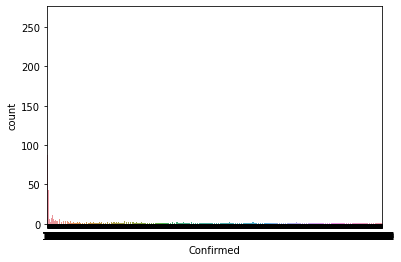

In [ ]:
sns.countplot(df['Confirmed'])

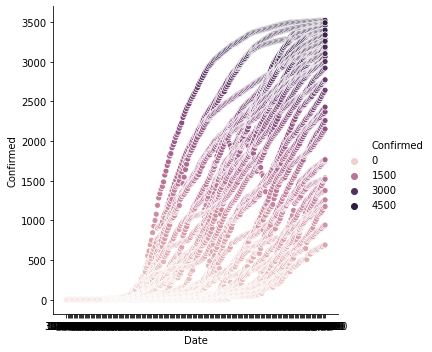

In [ ]:
sns.relplot(x='Date',y='Confirmed',hue="Confirmed",data=df)

In [ ]:
X=df.drop('Confirmed',axis=1)
y=df['Confirmed']
from sklearn.linear_model import LinearRegression

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#s=StandardScaler()
#X_train=s.fit_transform(X_train)
#X_test=s.transform(X_test)
regressor = LinearRegression()
regressor.fit(X_train, y_train) 
print(regressor.intercept_)

ValueError: ignored